Importing the Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [9]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('C:/Users/abhim/Desktop/ML Projects/Gold Price Prediction/gld_price_data.csv')

In [10]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [13]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [16]:
correlation = gold_data.corr()

<AxesSubplot:>

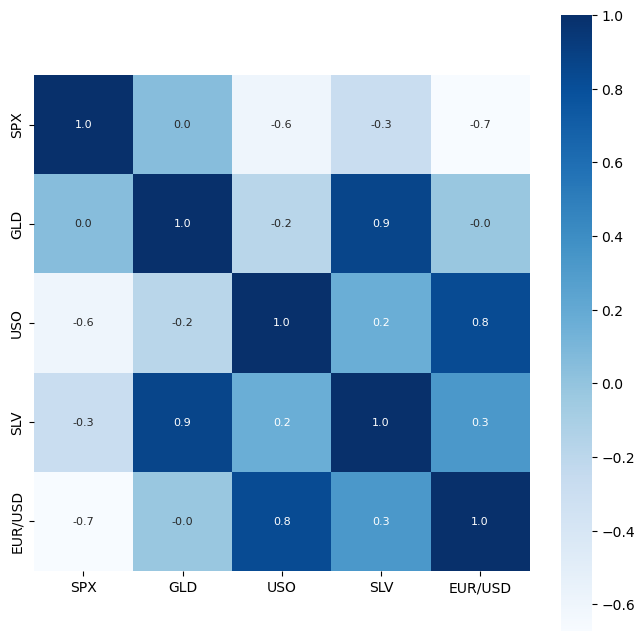

In [17]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\abhim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

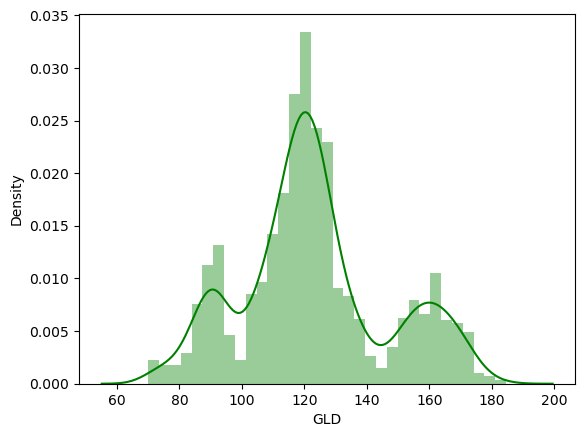

In [19]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

# Analysis

The plot reveals that gold prices in the dataset exhibit a bimodal distribution with two prominent peaks around 120 and 90. This suggests the presence of two different price regimes or periods. The overall range of prices from 60 to 200 shows significant variability in gold prices. Understanding these patterns can be crucial for further analysis, modeling, or decision-making processes related to gold investments or trading strategies.




Splitting the Features and Target

In [20]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.31929924  82.09279988 115.80140034 127.56890072 120.84470127
 154.6527975  150.45029884 126.07100029 117.54289856 125.95160116
 116.77110086 172.09890057 141.80959814 167.85079875 115.03239993
 117.82230025 140.30710237 170.01160054 159.16840309 159.65399998
 155.11269997 125.62030034 176.16319911 156.7431035  125.20510029
  93.70719944  77.65340018 120.78829993 119.12979937 167.49909903
  88.28700028 125.38090072  91.12620086 117.67120014 121.08579886
 136.05640036 115.41980129 115.14900089 149.59549969 106.93230109
 104.66230245  87.17349797 126.51700042 117.76650025 153.80189909
 119.57480026 108.43749925 107.91309802  93.12960069 127.10369791
  75.1661003  113.72009948 121.14130008 111.13069928 118.90089901
 120.87149948 159.45279994 167.73000077 147.02739665  85.84289866
  94.28470024  86.85589938  90.64400012 118.94120037 126.39970049
 127.59530048 170.77969951 122.36919945 117.13869888  98.79759983
 167.9825999  143.15119893 131.94570228 121.22980218 121.24129912
 119.86290

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892161852661344


Compare the Actual Values and Predicted Values in a Plot

In [29]:
Y_test = list(Y_test)

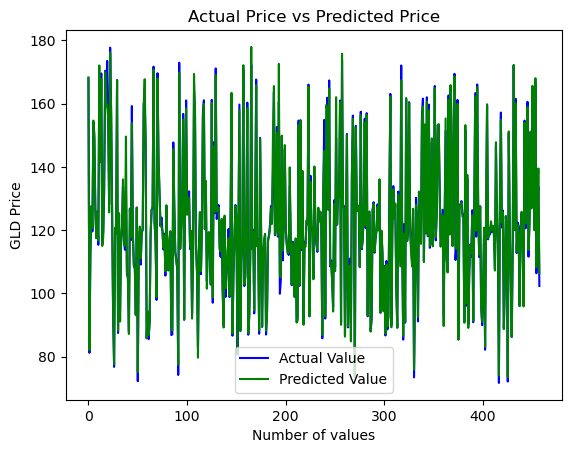

In [30]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Analyses

The blue and green lines are closely aligned throughout the plot, indicating that the predicted values are very close to the actual values. This close alignment suggests that the prediction model is performing well in capturing the trends and patterns in the actual GLD prices.

### Variability:

The plot shows high variability in GLD prices, ranging from around 80 to 180. Despite this variability, the predicted values manage to follow the actual prices closely.

### Pattern Consistency:

The consistency between the actual and predicted values across the entire range of data points shows that the model has learned the underlying patterns in the data effectively.
There are no large, noticeable gaps between the actual and predicted values, which would indicate significant prediction errors.